## 1.Loading the Required Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [159]:
from sklearn.metrics import mean_squared_error

## 2.Loading the dataset

In [160]:
df=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/energy/Electric_Production.csv',parse_dates=['DATE'])

In [161]:
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


## 3.Exploratory Data Analysis

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [163]:
df.DATE.min(),df.DATE.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [164]:
df.columns=['Date','Production']

In [165]:
df=df.set_index('Date')

In [166]:
#plotting the time series

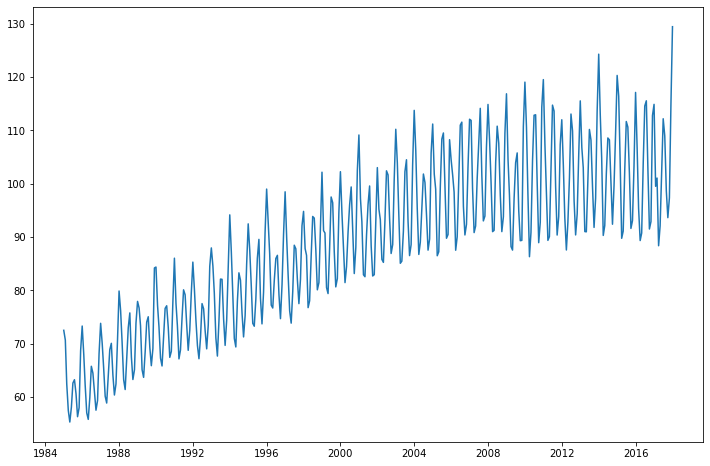

In [167]:
plt.figure(figsize=(12,8))
plt.plot(df['Production'])
plt.show()

In [168]:
#test for stationarity

In [169]:
#KPSS test
#H0=stationary

In [170]:
from warnings import filterwarnings
filterwarnings('ignore')

In [171]:
kpss_res=kpss(df,nlags='auto')

In [172]:
kpss_res[0]

3.5315970094994857

In [173]:
kpss_res[1]

0.01

We reject the null hypothesis. The data is non stationary.

In [174]:
#Decomposing the timeseries

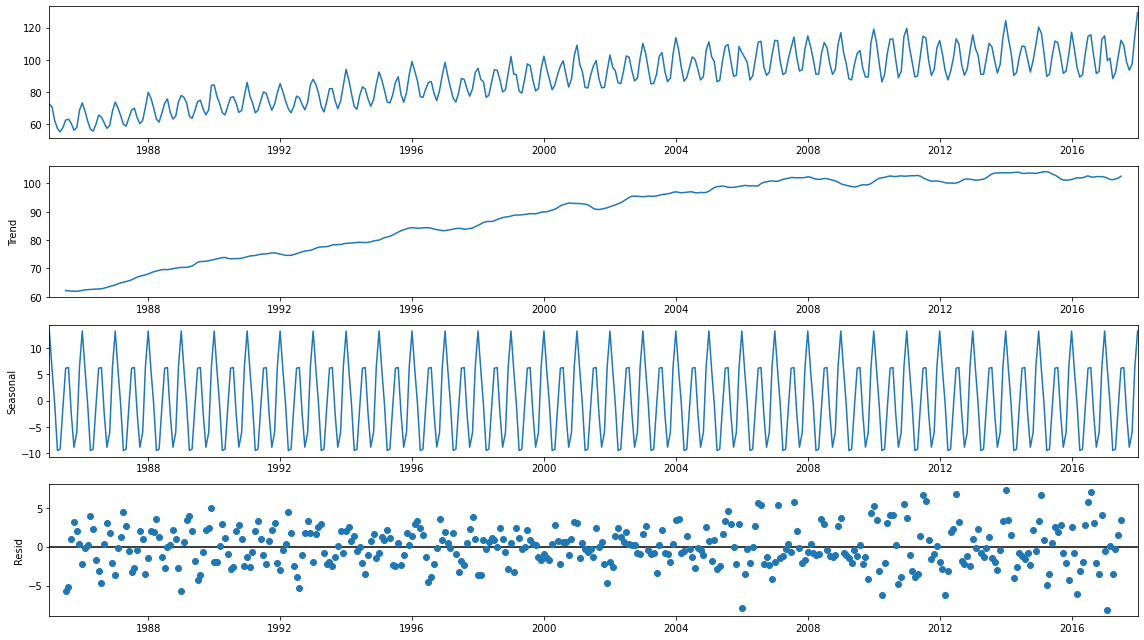

In [175]:
rcParams['figure.figsize']=16,9
decomposition=sm.tsa.seasonal_decompose(df,model='additive')
decomposition.plot()
plt.show()

## 4.ARIMA Model

In [177]:
import itertools

In [184]:
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [185]:
for i in range(len(pdq)):
    print('SARIMAX {} x {}'.format(pdq[i],seasonal_pdq[i]))

SARIMAX (0, 0, 0) x (0, 0, 0, 12)
SARIMAX (0, 0, 1) x (0, 0, 1, 12)
SARIMAX (0, 0, 2) x (0, 0, 2, 12)
SARIMAX (0, 1, 0) x (0, 1, 0, 12)
SARIMAX (0, 1, 1) x (0, 1, 1, 12)
SARIMAX (0, 1, 2) x (0, 1, 2, 12)
SARIMAX (0, 2, 0) x (0, 2, 0, 12)
SARIMAX (0, 2, 1) x (0, 2, 1, 12)
SARIMAX (0, 2, 2) x (0, 2, 2, 12)
SARIMAX (1, 0, 0) x (1, 0, 0, 12)
SARIMAX (1, 0, 1) x (1, 0, 1, 12)
SARIMAX (1, 0, 2) x (1, 0, 2, 12)
SARIMAX (1, 1, 0) x (1, 1, 0, 12)
SARIMAX (1, 1, 1) x (1, 1, 1, 12)
SARIMAX (1, 1, 2) x (1, 1, 2, 12)
SARIMAX (1, 2, 0) x (1, 2, 0, 12)
SARIMAX (1, 2, 1) x (1, 2, 1, 12)
SARIMAX (1, 2, 2) x (1, 2, 2, 12)
SARIMAX (2, 0, 0) x (2, 0, 0, 12)
SARIMAX (2, 0, 1) x (2, 0, 1, 12)
SARIMAX (2, 0, 2) x (2, 0, 2, 12)
SARIMAX (2, 1, 0) x (2, 1, 0, 12)
SARIMAX (2, 1, 1) x (2, 1, 1, 12)
SARIMAX (2, 1, 2) x (2, 1, 2, 12)
SARIMAX (2, 2, 0) x (2, 2, 0, 12)
SARIMAX (2, 2, 1) x (2, 2, 1, 12)
SARIMAX (2, 2, 2) x (2, 2, 2, 12)


### Model Building (Try Models)

In [187]:
aic_scores={}
i=1

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(df,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=model.fit()
            print('{}: ARIMA {} x {}12.AIC: {}'.format(i,param,param_seasonal,results.aic))
            aic_scores[i]=results.aic
            i+=1
        except:
            continue

1: ARIMA (0, 0, 0) x (0, 0, 0, 12)12.AIC: 4691.4667493072775
2: ARIMA (0, 0, 0) x (0, 0, 1, 12)12.AIC: 4080.9476251238916
3: ARIMA (0, 0, 0) x (0, 0, 2, 12)12.AIC: 3574.469016272269
4: ARIMA (0, 0, 0) x (0, 1, 0, 12)12.AIC: 2088.268212864115
5: ARIMA (0, 0, 0) x (0, 1, 1, 12)12.AIC: 2030.2661134096597
6: ARIMA (0, 0, 0) x (0, 1, 2, 12)12.AIC: 1966.3085460576965
7: ARIMA (0, 0, 0) x (0, 2, 0, 12)12.AIC: 2316.2443285873997
8: ARIMA (0, 0, 0) x (0, 2, 1, 12)12.AIC: 1961.92255629138
9: ARIMA (0, 0, 0) x (0, 2, 2, 12)12.AIC: 1818.9920851120714
10: ARIMA (0, 0, 0) x (1, 0, 0, 12)12.AIC: 2056.914633885044
11: ARIMA (0, 0, 0) x (1, 0, 1, 12)12.AIC: 2019.7440345171412
12: ARIMA (0, 0, 0) x (1, 0, 2, 12)12.AIC: 1965.1517000591057
13: ARIMA (0, 0, 0) x (1, 1, 0, 12)12.AIC: 2034.8300266663969
14: ARIMA (0, 0, 0) x (1, 1, 1, 12)12.AIC: 2031.5791873246144
15: ARIMA (0, 0, 0) x (1, 1, 2, 12)12.AIC: 1845.8864915330473
16: ARIMA (0, 0, 0) x (1, 2, 0, 12)12.AIC: 2132.0633361741684
17: ARIMA (0, 0, 0) x 

134: ARIMA (0, 1, 1) x (2, 2, 1, 12)12.AIC: 1757.4753696249518
135: ARIMA (0, 1, 1) x (2, 2, 2, 12)12.AIC: 1702.964051410013
136: ARIMA (0, 1, 2) x (0, 0, 0, 12)12.AIC: 2519.092324306248
137: ARIMA (0, 1, 2) x (0, 0, 1, 12)12.AIC: 2215.533122723571
138: ARIMA (0, 1, 2) x (0, 0, 2, 12)12.AIC: 2063.216719983917
139: ARIMA (0, 1, 2) x (0, 1, 0, 12)12.AIC: 1915.3510831165263
140: ARIMA (0, 1, 2) x (0, 1, 1, 12)12.AIC: 1726.3653885040267
141: ARIMA (0, 1, 2) x (0, 1, 2, 12)12.AIC: 1679.8070833143013
142: ARIMA (0, 1, 2) x (0, 2, 0, 12)12.AIC: 2208.3527725942363
143: ARIMA (0, 1, 2) x (0, 2, 1, 12)12.AIC: 1848.7335384621479
144: ARIMA (0, 1, 2) x (0, 2, 2, 12)12.AIC: 1658.0858465388415
145: ARIMA (0, 1, 2) x (1, 0, 0, 12)12.AIC: 1917.262067889256
146: ARIMA (0, 1, 2) x (1, 0, 1, 12)12.AIC: 1766.2138533987027
147: ARIMA (0, 1, 2) x (1, 0, 2, 12)12.AIC: 1719.2289644608227
148: ARIMA (0, 1, 2) x (1, 1, 0, 12)12.AIC: 1828.6786832458743
149: ARIMA (0, 1, 2) x (1, 1, 1, 12)12.AIC: 1728.36537288583

265: ARIMA (1, 0, 0) x (2, 1, 0, 12)12.AIC: 1747.6318264595625
266: ARIMA (1, 0, 0) x (2, 1, 1, 12)12.AIC: 1729.501176527747
267: ARIMA (1, 0, 0) x (2, 1, 2, 12)12.AIC: 1731.3297848801562
268: ARIMA (1, 0, 0) x (2, 2, 0, 12)12.AIC: 1869.219485909021
269: ARIMA (1, 0, 0) x (2, 2, 1, 12)12.AIC: 1710.3450234944341
270: ARIMA (1, 0, 0) x (2, 2, 2, 12)12.AIC: 1692.0484099525377
271: ARIMA (1, 0, 1) x (0, 0, 0, 12)12.AIC: 2618.177848843563
272: ARIMA (1, 0, 1) x (0, 0, 1, 12)12.AIC: 2330.8096181084798
273: ARIMA (1, 0, 1) x (0, 0, 2, 12)12.AIC: 2193.2445753053
274: ARIMA (1, 0, 1) x (0, 1, 0, 12)12.AIC: 1926.8969967953283
275: ARIMA (1, 0, 1) x (0, 1, 1, 12)12.AIC: 1773.4373068971086
276: ARIMA (1, 0, 1) x (0, 1, 2, 12)12.AIC: 1723.0321485961956
277: ARIMA (1, 0, 1) x (0, 2, 0, 12)12.AIC: 2207.3261864459605
278: ARIMA (1, 0, 1) x (0, 2, 1, 12)12.AIC: 1844.546576797938
279: ARIMA (1, 0, 1) x (0, 2, 2, 12)12.AIC: 1682.978346526556
280: ARIMA (1, 0, 1) x (1, 0, 0, 12)12.AIC: 1925.843335416399
2

396: ARIMA (1, 1, 2) x (1, 2, 2, 12)12.AIC: 1651.9667607303313
397: ARIMA (1, 1, 2) x (2, 0, 0, 12)12.AIC: 1813.937822369116
398: ARIMA (1, 1, 2) x (2, 0, 1, 12)12.AIC: 1723.0024943331548
399: ARIMA (1, 1, 2) x (2, 0, 2, 12)12.AIC: 1709.8788685661339
400: ARIMA (1, 1, 2) x (2, 1, 0, 12)12.AIC: 1709.5863753415115
401: ARIMA (1, 1, 2) x (2, 1, 1, 12)12.AIC: 1669.6209323912212
402: ARIMA (1, 1, 2) x (2, 1, 2, 12)12.AIC: 1662.3604301916948
403: ARIMA (1, 1, 2) x (2, 2, 0, 12)12.AIC: 1869.9908434726456
404: ARIMA (1, 1, 2) x (2, 2, 1, 12)12.AIC: 1700.0875841265874
405: ARIMA (1, 1, 2) x (2, 2, 2, 12)12.AIC: 1659.4922777552567
406: ARIMA (1, 2, 0) x (0, 0, 0, 12)12.AIC: 2815.03769625762
407: ARIMA (1, 2, 0) x (0, 0, 1, 12)12.AIC: 2520.367827761518
408: ARIMA (1, 2, 0) x (0, 0, 2, 12)12.AIC: 2381.761117557676
409: ARIMA (1, 2, 0) x (0, 1, 0, 12)12.AIC: 2234.9628664238558
410: ARIMA (1, 2, 0) x (0, 1, 1, 12)12.AIC: 2015.1634681102933
411: ARIMA (1, 2, 0) x (0, 1, 2, 12)12.AIC: 1959.00798611650

527: ARIMA (2, 0, 1) x (1, 1, 1, 12)12.AIC: 1780.6761410229842
528: ARIMA (2, 0, 1) x (1, 1, 2, 12)12.AIC: 1729.7432804772225
529: ARIMA (2, 0, 1) x (1, 2, 0, 12)12.AIC: 2004.1582861445818
530: ARIMA (2, 0, 1) x (1, 2, 1, 12)12.AIC: 1803.6553258229565
531: ARIMA (2, 0, 1) x (1, 2, 2, 12)12.AIC: 1686.8394252550413
532: ARIMA (2, 0, 1) x (2, 0, 0, 12)12.AIC: 1823.0221057235892
533: ARIMA (2, 0, 1) x (2, 0, 1, 12)12.AIC: 1729.4699494035713
534: ARIMA (2, 0, 1) x (2, 0, 2, 12)12.AIC: 1749.1272279002733
535: ARIMA (2, 0, 1) x (2, 1, 0, 12)12.AIC: 1743.7214240825506
536: ARIMA (2, 0, 1) x (2, 1, 1, 12)12.AIC: 1718.5246160514569
537: ARIMA (2, 0, 1) x (2, 1, 2, 12)12.AIC: 1720.3260421538732
538: ARIMA (2, 0, 1) x (2, 2, 0, 12)12.AIC: 1863.1108805159624
539: ARIMA (2, 0, 1) x (2, 2, 1, 12)12.AIC: 1707.301335435648
540: ARIMA (2, 0, 1) x (2, 2, 2, 12)12.AIC: 1690.5701617272862
541: ARIMA (2, 0, 2) x (0, 0, 0, 12)12.AIC: 2484.6037056621153
542: ARIMA (2, 0, 2) x (0, 0, 1, 12)12.AIC: 2198.3180934

658: ARIMA (2, 2, 0) x (1, 0, 0, 12)12.AIC: 2103.482264822161
659: ARIMA (2, 2, 0) x (1, 0, 1, 12)12.AIC: 1959.6827202827344
660: ARIMA (2, 2, 0) x (1, 0, 2, 12)12.AIC: 1906.4375897939667
661: ARIMA (2, 2, 0) x (1, 1, 0, 12)12.AIC: 1994.6443443722753
662: ARIMA (2, 2, 0) x (1, 1, 1, 12)12.AIC: 1926.2940353455065
663: ARIMA (2, 2, 0) x (1, 1, 2, 12)12.AIC: 1875.1884918625917
664: ARIMA (2, 2, 0) x (1, 2, 0, 12)12.AIC: 2192.88041506039
665: ARIMA (2, 2, 0) x (1, 2, 1, 12)12.AIC: 1980.0435926377108
666: ARIMA (2, 2, 0) x (1, 2, 2, 12)12.AIC: 1846.6719606292122
667: ARIMA (2, 2, 0) x (2, 0, 0, 12)12.AIC: 1996.286848122387
668: ARIMA (2, 2, 0) x (2, 0, 1, 12)12.AIC: 1905.7705608783021
669: ARIMA (2, 2, 0) x (2, 0, 2, 12)12.AIC: 1901.3469186955722
670: ARIMA (2, 2, 0) x (2, 1, 0, 12)12.AIC: 1897.0720131567373
671: ARIMA (2, 2, 0) x (2, 1, 1, 12)12.AIC: 1867.3153727720805
672: ARIMA (2, 2, 0) x (2, 1, 2, 12)12.AIC: 1869.287871602423
673: ARIMA (2, 2, 0) x (2, 2, 0, 12)12.AIC: 2045.49806291853

In [188]:
#getting the key for the lowest AIC

In [189]:
min(aic_scores.values())

1649.9667798619273

In [190]:
min(aic_scores,key=aic_scores.get)

387

### Final Model

We will build the final model using pdq=(1,1,2) and seasonal_pdq=(0,2,2,12)

In [191]:
final_model=sm.tsa.statespace.SARIMAX(df,
                                    order=(1,1,2),
                                    seasonal_order=(0,2,2,12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
final_results=final_model.fit()

### Predicting the results for test set

In [193]:
pred=final_results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)

In [194]:
pred.predicted_mean

2017-01-01    120.710292
2017-02-01    107.229360
2017-03-01     95.058164
2017-04-01     89.122260
2017-05-01     90.789071
2017-06-01    103.837487
2017-07-01    112.593724
2017-08-01    112.528805
2017-09-01     97.764241
2017-10-01     89.804223
2017-11-01     95.082204
2017-12-01    111.899171
2018-01-01    120.991524
Freq: MS, Name: predicted_mean, dtype: float64

            lower Production  upper Production
2017-01-01        116.056982        125.363602
2017-02-01        102.576130        111.882589
2017-03-01         90.411844         99.704484
2017-04-01         84.476712         93.767809
2017-05-01         86.143952         95.434191
2017-06-01         99.192770        108.482203
2017-07-01        107.949373        117.238075
2017-08-01        107.884787        117.172823
2017-09-01         93.120526        102.407956
2017-10-01         85.160785         94.447662
2017-11-01         90.439017         99.725391
2017-12-01        107.256213        116.542128
2018-01-01        116.348776        125.634273


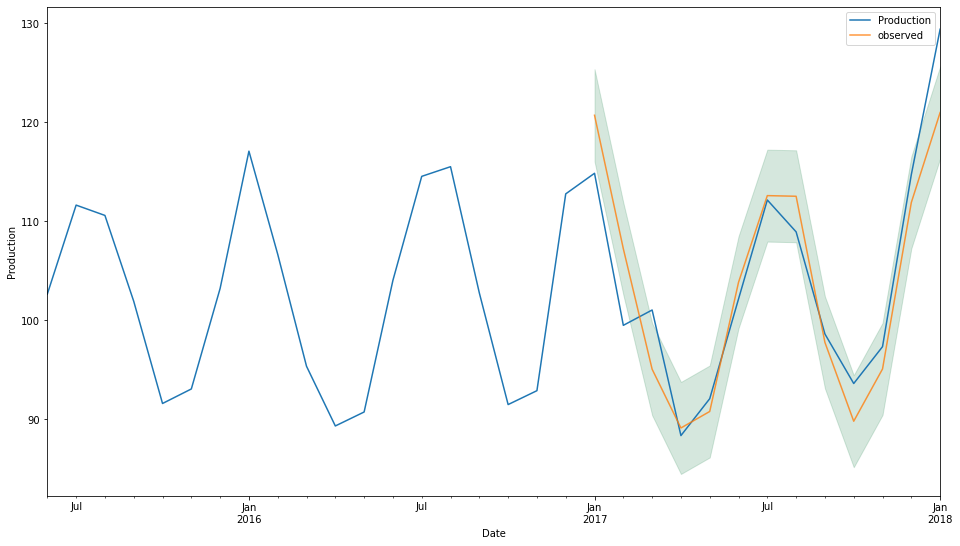

In [195]:
pred_ci=pred.conf_int()
print(pred_ci)

ax=df['2015-06-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='observed',alpha=0.8,figsize=[16,9])

ax.fill_between(pred_ci.index,
               pred_ci['lower Production'],
               pred_ci['upper Production'],alpha=0.2,color='seagreen')

ax.set_xlabel('Date')
ax.set_ylabel('Production')

plt.legend()
plt.show()

### Forecasting for future timeframe

In [197]:
future_pred=final_results.get_prediction(start=pd.to_datetime('2018-02-01'),end=pd.to_datetime('2019-02-01'),dynamic=False)

In [198]:
future_pred.predicted_mean

2018-02-01    114.226505
2018-03-01    103.472256
2018-04-01     90.221552
2018-05-01     92.410777
2018-06-01    104.501071
2018-07-01    114.549933
2018-08-01    114.041247
2018-09-01    101.035339
2018-10-01     91.832404
2018-11-01     94.820272
2018-12-01    111.570297
2019-01-01    120.782072
2019-02-01    109.815446
Freq: MS, Name: predicted_mean, dtype: float64

            lower Production  upper Production
2018-02-01        109.583832        118.869178
2018-03-01         98.165617        108.778895
2018-04-01         84.732932         95.710172
2018-05-01         86.854625         97.966929
2018-06-01         98.911078        110.091065
2018-07-01        108.937801        120.162066
2018-08-01        108.411575        119.670919
2018-09-01         95.390086        106.680592
2018-10-01         86.172448         97.492359
2018-11-01         89.146027        100.494517
2018-12-01        105.881968        117.258627
2019-01-01        115.079769        126.484374
2019-02-01        104.044787        115.586104


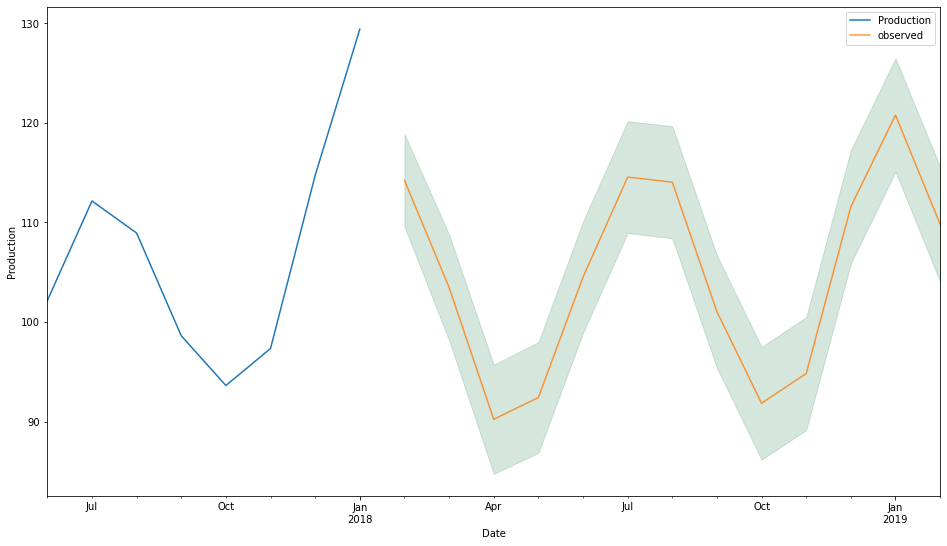

In [199]:
future_pred_ci=future_pred.conf_int()
print(future_pred_ci)

ax=df['2017-06-01':].plot(label='observed')
future_pred.predicted_mean.plot(ax=ax,label='observed',alpha=0.8,figsize=[16,9])

ax.fill_between(future_pred_ci.index,
               future_pred_ci['lower Production'],
               future_pred_ci['upper Production'],alpha=0.2,color='seagreen')

ax.set_xlabel('Date')
ax.set_ylabel('Production')

plt.legend()
plt.show()

### Calculating mse and rmse

In [201]:
y_actual=df['2017-01-01':].values.reshape(1,-1)
y_actual

array([[114.8505,  99.4901, 101.0396,  88.353 ,  92.0805, 102.1532,
        112.1538, 108.9312,  98.6154,  93.6137,  97.3359, 114.7212,
        129.4048]])

In [202]:
y_pred=pred.predicted_mean.values
y_pred

array([120.71029203, 107.22935958,  95.05816382,  89.12226013,
        90.78907106, 103.83748666, 112.59372394, 112.52880461,
        97.76424105,  89.80422345,  95.08220404, 111.8991709 ,
       120.99152433])

In [203]:
mse=((y_actual-y_pred)**2).mean()
mse

19.02356369122456

In [204]:
rmse=np.sqrt(mse)
rmse

4.361601046774517

## 5.Holt Winters Model

In [206]:
train=df.iloc[:-15]
test=df.iloc[-15:]

In [207]:
train.shape,test.shape

((382, 1), (15, 1))

In [208]:
seasonal_periods=12

In [209]:
alpha=1/(2*seasonal_periods)

In [210]:
model=ExponentialSmoothing(endog=train,seasonal_periods=12,trend='mul',seasonal='add')

In [211]:
fitted=model.fit(optimized=True,use_brute=True,smoothing_level=alpha)

In [212]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Production   No. Observations:                  382
Model:             ExponentialSmoothing   SSE                           2673.079
Optimized:                         True   AIC                            775.206
Trend:                   Multiplicative   BIC                            838.333
Seasonal:                      Additive   AICC                           777.090
Seasonal Periods:                    12   Date:                 Mon, 07 Nov 2022
Box-Cox:                          False   Time:                         23:46:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0416667                alpha                False
smoothing_trend          

### Predicting with test data

In [214]:
test_pred=fitted.forecast(steps=15)
test_pred

2016-11-01     95.920786
2016-12-01    109.009417
2017-01-01    118.845945
2017-02-01    110.223354
2017-03-01    101.002664
2017-04-01     90.609577
2017-05-01     92.213472
2017-06-01    103.335218
2017-07-01    112.522816
2017-08-01    112.108436
2017-09-01    101.328661
2017-10-01     92.515812
2017-11-01     96.152732
2017-12-01    109.241382
2018-01-01    119.077929
Freq: MS, dtype: float64

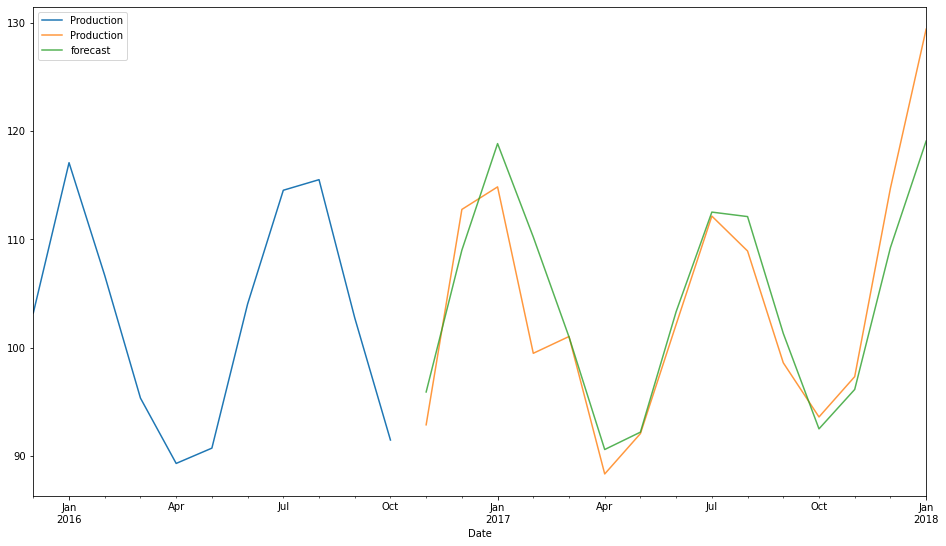

In [215]:
ax=train['2015-12-01':].plot(label='past')
test.plot(ax=ax,label='actual',alpha=.8,figsize=[16,9])
test_pred.plot(ax=ax,label='forecast',alpha=.8,figsize=[16,9])

plt.legend()
plt.show()

## Calculating mse and rmse

In [217]:
mse=mean_squared_error(test,test_pred)
mse

21.1912347423007

In [218]:
rmse=np.sqrt(mse)
rmse

4.60339382872036